<a href="https://colab.research.google.com/github/Pedrobertuola/Mercado-Financeiro/blob/main/indicador_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program determines if BTC is over bought or over sold


In [2]:
#Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#Load the data
from google.colab import files
files.upload()

Saving BTC-USD.csv to BTC-USD.csv


{'BTC-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,31288157264\n2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,29584186947\n2020-05-27,8837.380859,9203.320313,8834.157227,9181.017578,9181.017578,32740536902\n2020-05-28,9184.945313,9546.319336,9148.457031,9525.750977,9525.750977,34367073114\n2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,9439.124023,32896642044\n2020-05-30,9438.914063,9704.030273,9366.729492,9700.414063,9700.414063,32722975141\n2020-05-31,9700.105469,9700.343750,9432.296875,9461.058594,9461.058594,27773290299\n2020-06-01,9463.605469,10199.565430,9450.899414,10167.268555,10167.268555,35198901068\n2020-06-02,10162.973633,10182.340820,9460.571289,9529.803711,9529.803711,39137252109\n2020-06-03,9533.760742,9682.859375,9471.846680,9656.717773,9656.717773,25007459262\n2020-06-04,9655.854492,9887.610352,9525.247070,9800.636719,9800.636719,25921805072\n2020-06-05

In [8]:
#Store the data
df = pd.read_csv('BTC-USD.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-05-25,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2020-05-26,2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,2.958419e+10
2020-05-27,2020-05-27,8837.380859,9203.320313,8834.157227,9181.017578,9181.017578,3.274054e+10
2020-05-28,2020-05-28,9184.945313,9546.319336,9148.457031,9525.750977,9525.750977,3.436707e+10
2020-05-29,2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,9439.124023,3.289664e+10
...,...,...,...,...,...,...,...
2021-05-21,2021-05-21,40596.949219,42172.171875,33616.453125,37304.691406,37304.691406,8.205162e+10
2021-05-22,2021-05-22,37371.031250,38831.054688,35383.683594,37536.632813,37536.632813,5.737727e+10
2021-05-23,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,7.846927e+10
2021-05-24,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10


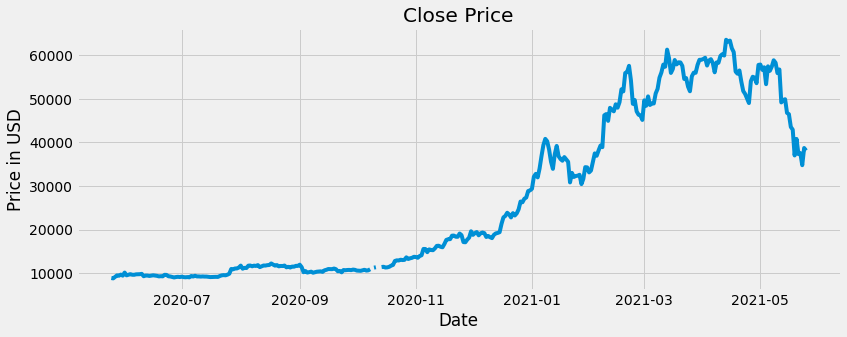

In [9]:
#Create and plot the graph
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['Close'], label='Close')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [14]:
#Calculate the RSI
delta = df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[ up < 0] = 0
down[ down > 0 ] = 0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/(1.0+RS))

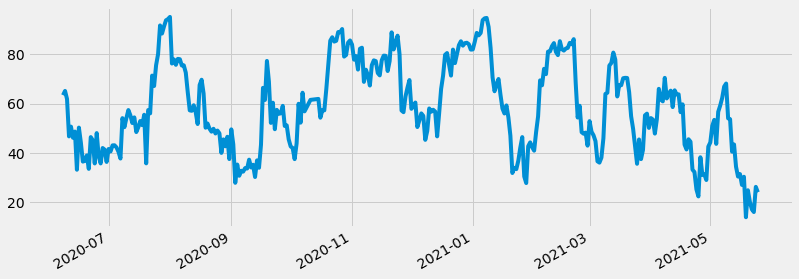

In [15]:
#Plot the RSI
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

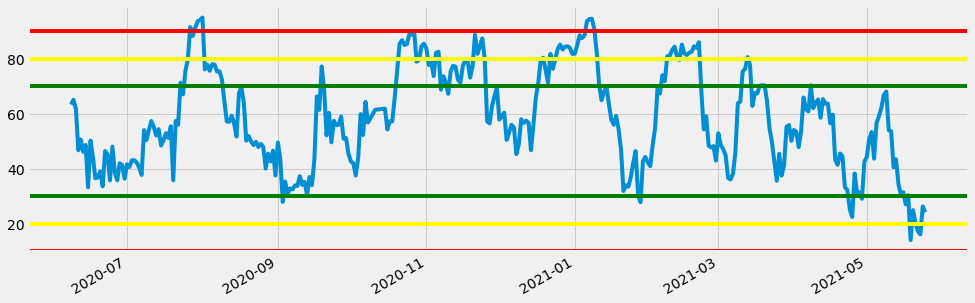

In [16]:
#Plot the RSI with over bought and over sold RSI lines/levels
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
ax0.axhline(20, color='yellow')
ax0.axhline(80, color='yellow')
ax0.axhline(10, color='red')
ax0.axhline(90, color='red')